Log 4, 10000 тэв в E0  
Выбросить высокоэнергетичные события из старого банка и низкоэнергичные из нового банка.  
Определить точное положение для объединения банков.    
Построить суммарную энергию для объединённых данных.  
Построить в объединённом банке распределение по высотам. По двум высотам: общим и доминирующим (доминирует хотя бы в одном кластерам).  
Из них можно сказать, что события образовались от сильных взаимодействий по тем высотам, которые мы смотрим. dn/dh h - высота частицы.   
Если после сравнения нового согласия распределений, мы можем считать что в эксперименте такое же распределение высот.   
  
Построить корреляцию число ni последних сильных взаимодействий - число разных индивидуальных высот, nc число построенных кластеров. Для каждого события, построить коэффициент корреляции и гистограмму.  
  
Число доминирующих взаимодействий   
n_i^d и число nc. Доминирующее взаимодействие - доминирует при образовании одного кластера.  
  
Выделение чистых событий. Частица попадает в атмосферу. Получаем продукты ядерно электромагнитного каскада. Каскад подвержен флуктуациям, они достаточно сильны, если мы рассматриваем самые энергичные частицы. С достаточно высокой долей порядка 1 % реализуется случай, когда падающая частица вообще не взаимодействовала. Пролетела просто так. 
А есть каскады, в которых только одно взаимодействие 7-10% - это чистые события. Они очень хорошие, потому что дают изучать отдельные сильные взаимодействия.  
Распределение dn/di по числу взаимодействий в формировании события. Самое вероятное 3-4 взаимодействия.  
  
Найти материалы по быстротным интервалам.  
  
Распределения по r_c - расстояние между энергетически взвешенным центром кластера до частицы в кластере.   
R_c от центра события до частицы.  
Построить по модели и по эксперименту, чтобы сравнить.  

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [14]:
# ГРАФИКА
large = 22; med = 18; small = 16
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
sns.set(style="whitegrid")

### Загрузка данных о первичных энергиях смоделированных частиц

In [4]:
# Первичная энергия событий в старой базе
oldE = pd.read_csv('newdata/E0_BCR.txt')
oldE = oldE.loc[oldE[' num_of_family']<1299].copy() # убираем дубли
oldE['log_E0'] = np.log10(oldE[' E0'])

# Первичная энергия событий в новой базе
newE = pd.read_csv('newdata/E0_7_BCR.txt')
newE['log_E0'] = np.log10(newE[' E0'])

In [5]:
oldE.head()

,num_of_family,E0,A0,log_E0
0,1,3366.712,1,3.527206
1,2,2096.696,1,3.321535
2,3,19011.010,1,4.279005
3,4,3188.047,1,3.503525
4,5,3345.026,1,3.524399


In [6]:
oldE['log_E0'].max()

5.908713311976288

In [7]:
newE.head()

,num_of_family,E0,A0,log_E0
0,1,24297.69,9,4.385565
1,2,40165.46,2,4.603853
2,3,60512.43,9,4.781845
3,4,21890.88,1,4.340263
4,5,66092.91,2,4.820155


In [8]:
newE['log_E0'].max()

6.443077805507344

### Сравним два банка и выберем границу для разделения частиц по энергиям

In [9]:
def Two_banks( dataS1, dataS2, L, R, Some1, Some2, title, w, tit, density=False):
    
    title = f"{title}_{Some1}"
    
    bins = np.linspace(L, R, 50)
    
    x1, bins1, p1 = plt.hist(dataS1, bins, density = density, histtype=f'{w}', alpha=0.5, label=f'old_mc0', color="green", log = True)
    x2, bins2, p2 = plt.hist(dataS2, bins, density = density, histtype=f'{w}', alpha=0.5,  label=f'new_mc0', color="orange", log = True)
    # density = True это нормировка
    # log - логарифмирование шкалы
    
    box_1 = {'facecolor':'white',    #  цвет области
       'edgecolor': 'red',     #  цвет крайней линии
       'boxstyle': 'round'}
    
    box_str = f'{Some1}_mean: old = {round(np.mean(dataS1), 2)} new = {round(np.mean(dataS2), 2)} '
    
    
    plt.xlabel(box_str, size = 13)
    
    plt.legend(loc='upper right')
    plt.title(title, fontsize=16)
    plt.style.use('seaborn-deep')
    plt.savefig(f'images/distributions/{tit}.png')
    plt.show()
    
    

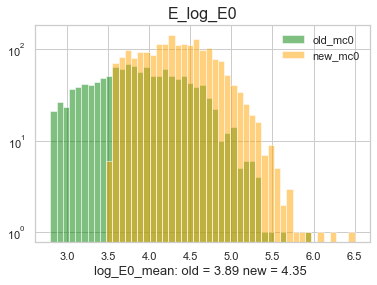

In [10]:
# Сравнение логарифмированных
file_name = 'Сравнение_первичных_энергий_банков'
n = 'log_E0'
l = 2.8
r = 6.5
Two_banks(oldE[n], newE[n],l, r, n, n, 'E', 'barstacked', file_name)

left threshold =  3.832633759665275
pvalue =  0.4740409485695565


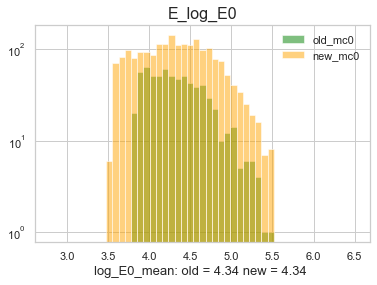

In [11]:
# нам нужна именно нижняя граница для разделения
left_thr = min(np.log10(oldE[n]))
right_thr = 5.5 # из вида гистограммы
pvalue = stats.mannwhitneyu(np.log10(oldE[n]), np.log10(newE[n])).pvalue

while left_thr < right_thr:
    left_thr += 0.05
    
    one = oldE[(oldE[n]>left_thr) & (oldE[n]<right_thr)][n].values
    two = newE[newE[n]<right_thr][n].values
    
    if len(one)!=0 and len(two)!=0:
        pvalue = stats.mannwhitneyu(one, two).pvalue
    
    if pvalue > 0.05:
        print('left threshold = ', left_thr)
        print('pvalue = ', pvalue)
        Two_banks(one, two,l, r, n, n, 'E', 'barstacked', file_name)
        break

In [12]:
# Семейства, которые мы хотим взять из старого банка с малыми энергиями.
old_families = oldE[(oldE[n]<left_thr)][' num_of_family'].values

In [13]:
# Семейства, которые мы хотим взять из нового банка с большими энергиями.
new_families = newE[(newE[n]>left_thr)][' num_of_family'].values

In [14]:
# есть пересечения в нумерации семейств,поэтому нужно их перенумеровать
print(len(old_families)+len(new_families))
print(len(list(set(old_families)-set(new_families))))

2311
91


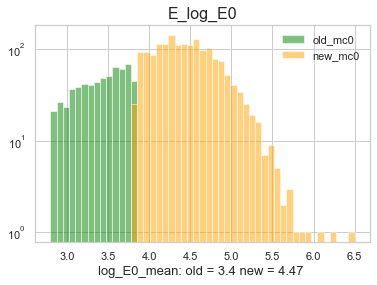

In [15]:
file_name = 'Сравнение_первичных_энергий_обрезанных_банков'
n = 'log_E0'
l = 2.8
r = 6.5
Two_banks(oldE[(oldE[n]<left_thr)][n], newE[(newE[n]>left_thr)][n],l, r, n, n, 'E', 'barstacked', file_name)

### Объединение банков

In [9]:
# Старый не обработанный банк событий.
# Объединяем его с A0 и E0.
olddata = pd.read_csv('data/AllMc0.csv')
olddata = olddata.loc[olddata[' num_of_family']<1299].copy() # убираем дублирование семейств
olddata = olddata.merge(oldE, left_on=' num_of_family', right_on=' num_of_family')

In [10]:
olddata.head()

,num_of_family,j,X(J),Y(J),E(J),H(J),E0,A0,log_E0
0,1,1,-3.013189,-7.227429,4.611031,1255.250,3366.712,1,3.527206
1,1,2,-1.310529,-2.563248,12.047700,1545.054,3366.712,1,3.527206
2,1,3,-2.178048,-2.144561,5.401844,3044.520,3366.712,1,3.527206
3,1,4,-0.965465,-0.082880,5.325506,4715.523,3366.712,1,3.527206
4,1,5,-1.621645,0.079540,15.935060,3044.520,3366.712,1,3.527206


In [18]:
olddata['log_E0'].max()

5.908713311976288

In [19]:
# Сохраняем старую дату для дальнейшего сравнения (!) до обрезания семейсв (!).
# olddata.to_csv('datachanged/AllMc0COld', sep = '\t', index = False)

In [21]:
all_len_old = len(olddata)
new_len_old = len(olddata[olddata[' num_of_family'].isin(old_families)])
print(all_len_old, new_len_old)

28449 9117


In [22]:
# Берем в старомм банке только выбранные семейства по нижним границам энергий.
olddata = olddata[olddata[' num_of_family'].isin(old_families)].copy()

In [23]:
# Перенумеровка семейств. Выводим последний номер семейства.
nums = list(set(olddata[' num_of_family']))
df_old = []
last_value = len(nums)+1
print('last_value = ', last_value)

for i in range(1, len(nums)+1):
    df = olddata[olddata[' num_of_family']==nums[i-1]][[' j', 'X(J)', 'Y(J)', 'E(J)', 'H(J)', ' E0', ' A0', 'log_E0']].copy()
    df['num'] = i
    df_old.append(df)
df_old = pd.concat(df_old)

last_value =  620


In [11]:
# новый банк событий.
# Объединяем его с A0 и E0.
newdata = pd.read_csv('newdata/outBCR.txt')
newdata_num = pd.read_csv('newdata/out_num_of_family_BCR.txt')
newdata[' num_of_family'] = newdata_num[' num_of_family']
#newdata = newdata.merge(oldE, left_on=' num_of_family', right_on=' num_of_family')
newdata = newdata.merge(newE, on=' num_of_family', how = 'left')

In [25]:
all_len_new = len(newdata)
new_len_new = len(newdata[newdata[' num_of_family'].isin(new_families)])
print(all_len_new, new_len_new)

115542 106990


In [26]:
# Берём в новом банке только выбранные семейства по верхней границе.
newdata = newdata[newdata[' num_of_family'].isin(new_families)].copy()

In [27]:
nums = list(set(newdata[' num_of_family']))
df_new = []
print('last_value_new = ', len(nums)+last_value)

for i in range(last_value, len(nums)+last_value):
    df = newdata[newdata[' num_of_family']==nums[i-last_value]][[' j', 'X(J)', 'Y(J)', 'E(J)', 'H(J)', ' E0', ' A0', 'log_E0']].copy()
    df['num'] = i
    df_new.append(df)
df_new = pd.concat(df_new)

last_value_new =  2312


In [28]:
AllMc0 = pd.concat([df_old,df_new])

In [29]:
#AllMc0.to_csv('newdata/newbankmc0', sep = '\t', index = False)

In [30]:
# Вычисляем расстояние до энергитического центра
def Create_Distance(X, Y):
    R = (X*X+Y*Y)**0.5
    return R

In [ ]:
# Удаление семейств, где количество частиц меньше или равно 3
def Amount(df, name):
    # Group values for Series and add 'cnt' column with count
    df['cnt'] = df.groupby([name])[name].transform('count')
    # Drop indexes for count value == 1, and dropping 'cnt' column
    df = df.drop(df[df.cnt<=2].index)
    return df

In [31]:
AllMc0['R'] = Create_Distance(AllMc0['X(J)'].values, AllMc0['Y(J)'].values)

In [32]:
len(AllMc0), len(AllMc0[AllMc0['R']<15])

(116107, 113159)

In [33]:
AllMc0 = AllMc0[AllMc0['R']<15].copy()
AllMc0 = Amount(AllMc0, 'num').copy()

In [34]:
AllMc0['ER']=AllMc0['E(J)']*AllMc0['R']

In [35]:
# Функция считает сумму энергий для всех частиц на пленке 
# Печатает номер семейства, в котором суммарная энергия меньше 100, такие мы не рассматриваем
def sum_energy(data, Some, name):
    
    Sum_of_E = []
    Sum_of_E_New = []
    
    Num = set(data[name])

    
    
    for i in Num: 
        OneFamily = pd.DataFrame( data.loc[lambda data: data[name] == i, :] ).copy()
        s = OneFamily[Some].sum()
        
        for j in range(len(OneFamily)):
            Sum_of_E_New.append( s ) 
        if s < 100:
            print(i)
        
        Sum_of_E.append( OneFamily[Some].sum() )    
    
    return Sum_of_E, Sum_of_E_New

In [36]:
Sum_EM,  Sum_of_EM_New = sum_energy(AllMc0, 'E(J)', 'num')

37
52
106
114
159
193
267
318
335
353
357
412
477
588
594
725
746
880
968
1012
1041
1099
1282
1300
1561
1595
1641
1685
1691
1741
1797
1939
1990
2179
2192
2197
2241
2245


In [37]:
AllMc0['sum_energy'] = Sum_of_EM_New
AllMc0 = AllMc0[AllMc0['sum_energy']>100].copy()

In [38]:
AllMc0['lg_r'] = np.log10(AllMc0['R'].values)
AllMc0['lg_e_r'] = np.log10(AllMc0['ER'].values)

In [138]:
# Сохранение обработанных файлов в папку datachanged
# AllMc0.to_csv('datachanged/AllMc0CNewBank', sep = '\t', index = False)

In [39]:
olddata = pd.read_csv('datachanged/AllMc0COld', sep = '\t')

In [40]:
olddata['R'] = Create_Distance(olddata['X(J)'].values, olddata['Y(J)'].values)

In [41]:
olddata = olddata[olddata['R']<15].copy()

In [42]:
olddata['ER']=olddata['E(J)']*olddata['R']

In [43]:
Sum_EM,  Sum_of_EM_New = sum_energy(olddata, 'E(J)', ' num_of_family')

52
55
70
95
113
214
225
226
239
263
308
309
312
323
349
434
492
539
554
564
573
667
675
704
754
762
772
782
784
831
862
893
988
1016
1114
1157
1160
1166
1193
1229
1240
1250
1259
1288
1289


In [44]:
olddata['sum_energy'] = Sum_of_EM_New
olddata = olddata[olddata['sum_energy']>100].copy()

In [45]:
# Сохранение обработанных файлов в папку AllMc0COld
# olddata.to_csv('datachanged/AllMc0COld', sep = '\t', index = False)

### Распределение по высотам 

In [310]:
AllMc0 = pd.read_csv('datachanged/AllMc0CNewBank', sep = '\t')
olddata = pd.read_csv('datachanged/AllMc0COld', sep = '\t')

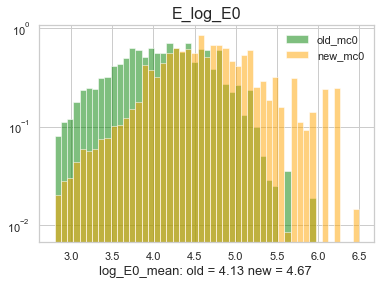

In [311]:
file_name = 'сравенение_объединённого_нового_банка_и_старого'
n = 'log_E0'
l = 2.8
r = 6.5
Two_banks(olddata[n], AllMc0[n],l, r, n, n, 'E', 'barstacked', file_name, True)

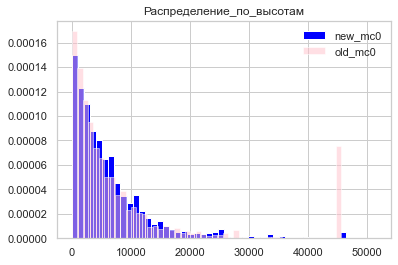

In [312]:
# Распределение по высотам
tit = 'Распределение_по_высотам'
plt.title(tit)
plt.hist(AllMc0['H(J)'], bins = 50, density = True, color  = 'blue', label = 'new_mc0')
plt.hist(olddata['H(J)'], bins = 50, density = True, alpha = 0.5, color = 'pink', label = 'old_mc0')
plt.savefig(f'images/distributions/{tit}.png')
plt.legend()
plt.show()

In [86]:
stats.mannwhitneyu(AllMc0['H(J)'], olddata['H(J)'])

MannwhitneyuResult(statistic=1603268641.0, pvalue=0.44913433300119787)

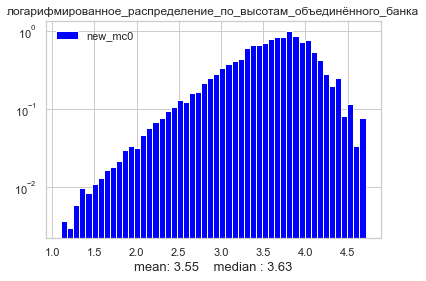

In [313]:
tit = 'логарифмированное_распределение_по_высотам_объединённого_банка'
s = 'H(J)'
plt.title(tit)
plt.hist(np.log10(AllMc0[s]), bins = 50, density = True, log=True, color  = 'blue', label = 'new_mc0')
box_str = f'mean: {round(np.mean(np.log10(AllMc0[s])), 2)}    median : {round(np.median(np.log10(AllMc0[s])), 2)}'
plt.xlabel(box_str, size = 13)
plt.savefig(f'images/distributions/{tit}.png')
plt.legend()
plt.show()

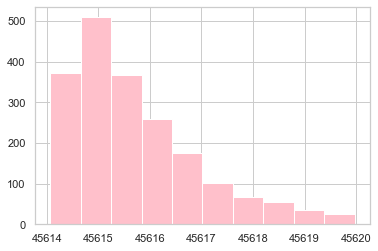

In [85]:
#посмотреть выброс высоты
plt.hist(olddata[olddata['H(J)']>44000]['H(J)'], bins = 10, density = False, color = 'pink', label = 'old_mc0')
plt.show()

In [91]:
def return_dom_h_family(data, name):
    nums = list(set(data[name]))
    Dom_H = []

    for num in nums:
        value = data[data[name]==num]['H(J)'].value_counts().head(1)
        Dom_H.append(value.index[0])
    return Dom_H

In [ ]:
# Распределение по доминирующим высотам в семействе
dom_h_new = return_dom_h_family(AllMc0, 'num')
dom_h_old = return_dom_h_family(olddata, ' num_of_family')

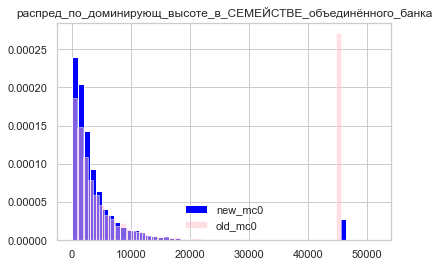

In [314]:
tit = 'распред_по_доминирующ_высоте_в_СЕМЕЙСТВЕ_объединённого_банка'
plt.title(tit)
plt.hist(dom_h_new, bins = 50, density = True, color = 'blue', label = 'new_mc0')
plt.hist(dom_h_old, bins = 50, density = True,alpha = 0.5,  color  = 'pink', label = 'old_mc0')
plt.savefig(f'images/distributions/{tit}.png')
plt.legend()
plt.show()

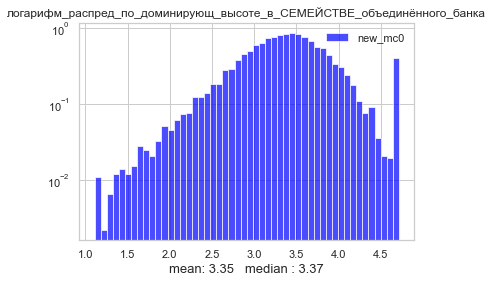

In [333]:
tit = 'логарифм_распред_по_доминирующ_высоте_в_СЕМЕЙСТВЕ_объединённого_банка'
s = 'H(J)'
plt.title(tit)
plt.hist(np.log10(dom_h_new), bins = 50, density = True, log = True, alpha = 0.7, color = 'blue', label = 'new_mc0')
box_str = f'mean: {round(np.mean(np.log10(dom_h_new)), 2)}   median : {round(np.median(np.log10(dom_h_new)), 2)}'
plt.xlabel(box_str, size = 13)
plt.savefig(f'images/distributions/{tit}.png')
plt.legend()
plt.show()

In [104]:
np.mean(dom_h_new), np.mean(np.log10(dom_h_new)) 

(6029.126253246695, 3.5377866428729443)

In [105]:
np.median(dom_h_new), np.median(np.log10(dom_h_new)) 

(4053.4184999999998, 3.607821348922532)

In [106]:
stats.mannwhitneyu(dom_h_old, dom_h_new)

MannwhitneyuResult(statistic=1362932.5, pvalue=9.731111180068137e-05)

Вывод:  
Распределение по всем высотам в первой версии смоделированных данных очень похоже на распределение во втором случае.  
Распределение по доминирующим высотам в первой версии смоделированных данных не похоже на распределение во втором случае.

In [108]:
def unique_h(data, name):
    nums = list(set(data[name]))
    Unique_H = []
    not_big = []
    
    for num in nums:
        value = len(data[data[name]==num]['H(J)'].unique())
        if value < 50:
            not_big.append(num)
#         else:
#             print(num)
            
        Unique_H.append(value)
        
    return Unique_H, not_big

In [42]:
# Пример большого семейства с большим числом различных высот.
len(AllMc0[AllMc0['num']==645]['H(J)'].unique())

59

In [334]:
# Распределение по числу уникальных высот в семействе
uni_h_new, not_big_new = unique_h(AllMc0, 'num')
uni_h_old, not_big_old = unique_h(olddata, ' num_of_family')

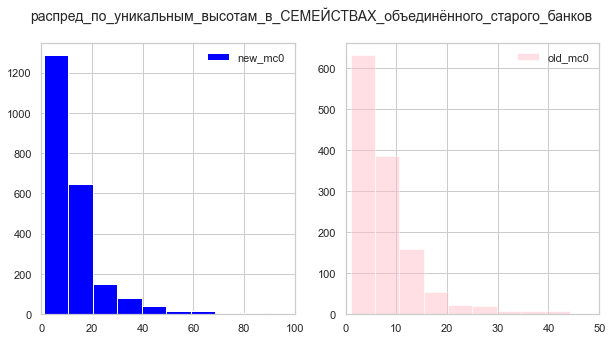

In [335]:
tit = 'распред_по_уникальным_высотам_в_СЕМЕЙСТВАХ_объединённого_старого_банков'


f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.hist(uni_h_new, bins = 60, color  = 'blue', label = 'new_mc0')
ax1.set_xlim([0, 100])
ax1.legend()

ax2.hist(uni_h_old, bins = 10, alpha = 0.5, color = 'pink', label = 'old_mc0')
ax2.set_xlim([0, 50])
ax2.legend()

plt.suptitle(tit, size = 14)
plt.savefig(f'images/distributions/{tit}.png')
plt.show()

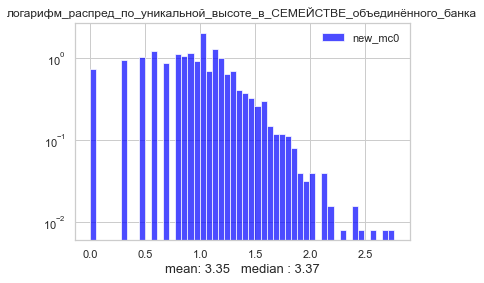

In [336]:
tit = 'логарифм_распред_по_уникальной_высоте_в_СЕМЕЙСТВЕ_объединённого_банка'
s = 'H(J)'
plt.title(tit)
plt.hist(np.log10(uni_h_new), bins = 50, density = True, log = True, alpha = 0.7, color = 'blue', label = 'new_mc0')
box_str = f'mean: {round(np.mean(np.log10(dom_h_new)), 2)}   median : {round(np.median(np.log10(dom_h_new)), 2)}'
plt.xlabel(box_str, size = 13)
plt.savefig(f'images/distributions/{tit}.png')
plt.legend()
plt.show()

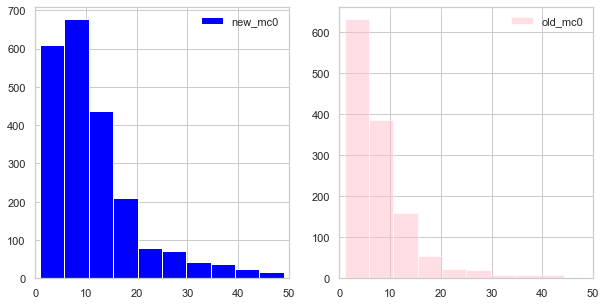

In [111]:
# Распределение по числу уникальных высот в семействе
uni_h_new, _ = unique_h(AllMc0[AllMc0['num'].isin(not_big_new)], 'num')
uni_h_old, _ = unique_h(olddata[olddata[' num_of_family'].isin(not_big_old)], ' num_of_family')

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.hist(uni_h_new, bins = 10, color  = 'blue', label = 'new_mc0')
ax1.set_xlim([0, 50])
ax1.legend()

ax2.hist(uni_h_old, bins = 10, alpha = 0.5, color = 'pink', label = 'old_mc0')
ax2.set_xlim([0, 50])
ax2.legend()
plt.show()

In [112]:
stats.mannwhitneyu(uni_h_old, uni_h_new)

MannwhitneyuResult(statistic=1015667.0, pvalue=7.8019833834775145e-47)

Вывод:  
Распределения сильно отличаются. В новом банке есть семейства с очень большим количеством различных высот, больше 50, в отличие от старого банка. Такие семейства появляются в результате добавления семейств с высокой первичной энергией частицы E0. 

## Кластеризация 
Алгоритм, сохранение в csv.

In [145]:
# Новый модельный банк.
AllMc0 = pd.read_csv('datachanged/AllMc0CNewBank', sep = '\t')
# Старый модельный банк.
olddata = pd.read_csv('datachanged/AllMc0COld', sep = '\t')

In [156]:
# Экспериментальные данные.
AllExp = pd.read_csv('datachanged/AllExpC')
AllExp = AllExp.drop(['Unnamed: 0'], axis = 1)

### Распределение кластеризованных данных.   
#### Сравнивать нужно с экспериментальными данными. 

In [3]:
clustered_df = pd.read_csv('clusterdata/clusteredDF', sep = '\t')
coef_df = pd.read_csv('clusterdata/coefDF', sep = '\t')

In [4]:
clustered_df_old = pd.read_csv('clusterdata/clusteredDFold', sep = '\t')
coef_df_old = pd.read_csv('clusterdata/coefDFold', sep = '\t')

In [5]:
clustered_df_exp = pd.read_csv('clusterdata/clusteredDFexp', sep = '\t')

In [122]:
coef_df[coef_df['Name']=='aglclust'].groupby('Name').mean()

,num_of_fam,P,S,I,E,M,V
Name,,,,,,,
aglclust,1157.825551,0.770089,0.917371,0.498367,0.853009,0.759708,0.045638


In [123]:
coef_df[coef_df['Name']=='dbscan'].groupby('Name').mean()

,num_of_fam,P,S,I,E,M,V
Name,,,,,,,
dbscan,1157.825551,0.819774,0.865078,0.476674,0.768412,0.732494,0.04676


### Распределение по количеству выделенных кластеров в модели и в эксперименте. 

In [142]:
def unique_clust(data, name, clust):
    nums = list(set(data[name]))
    Unique_H = []
    
    for num in nums:
        value = len(data[data[name]==num][clust].unique())
        Unique_H.append(value)
        
    return Unique_H

In [321]:
# Распределение по количеству выделенных кластеров

uniq_h_new = unique_clust(clustered_df, 'num', 'cluster_agl')
uniq_h_old = unique_clust(clustered_df_old, ' num_of_family', 'cluster_agl')
uniq_h_exp = unique_clust(clustered_df_exp, ' num_of_fam', 'cluster_agl')

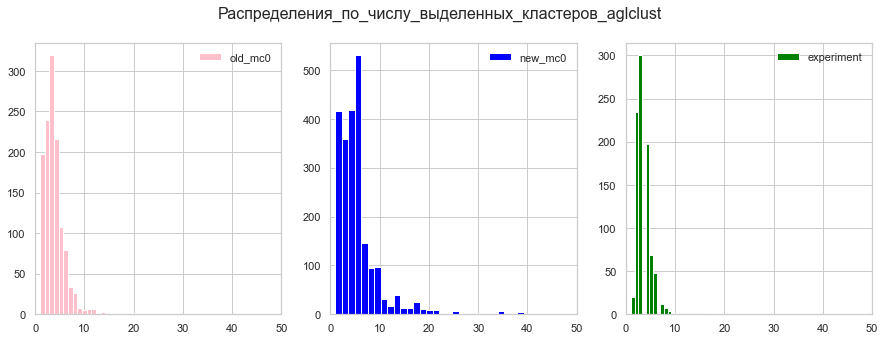

In [322]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

tit = 'Распределения_по_числу_выделенных_кластеров_aglclust'
plt.suptitle(tit, size = 16)

ax1.hist(uniq_h_old, bins = 20, color = 'pink', label = 'old_mc0')
ax1.set_xlim([0, 50])
ax1.legend()

ax2.hist(uniq_h_new, bins = 50, color  = 'blue', label = 'new_mc0')
ax2.set_xlim([0, 50])
ax2.legend()

ax3.hist(uniq_h_exp, bins = 20, color = 'green', label = 'experiment')
ax3.set_xlim([0, 50])
ax3.legend()

plt.savefig(f'images/distributions/{tit}.png')
plt.show()

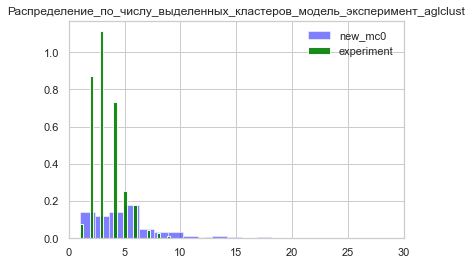

In [323]:
# Распределение по высотам
tit = 'Распределение_по_числу_выделенных_кластеров_модель_эксперимент_aglclust'
plt.title(tit)
plt.hist(uniq_h_new, bins = 50, density = True, alpha = 0.5, color  = 'blue', label = 'new_mc0')
plt.hist(uniq_h_exp, bins = 50, density = True, alpha = 0.9, color = 'green', label = 'experiment')
plt.savefig(f'images/distributions/{tit}.png')
plt.xlim([0,30])
plt.legend()
plt.show()

In [280]:
# Распределение по количеству выделенных кластеров

uniq_h_new = unique_clust(clustered_df, 'num', 'cluster_db')
uniq_h_old = unique_clust(clustered_df_old, ' num_of_family', 'cluster_db')
uniq_h_exp = unique_clust(clustered_df_exp, ' num_of_fam', 'cluster_db')

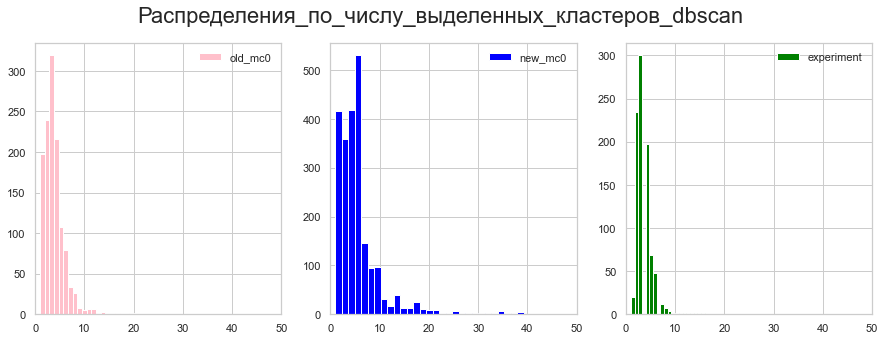

In [324]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

tit = 'Распределения_по_числу_выделенных_кластеров_dbscan'
plt.suptitle(tit)

ax1.hist(uniq_h_old, bins = 20, color = 'pink', label = 'old_mc0')
ax1.set_xlim([0, 50])
ax1.legend()

ax2.hist(uniq_h_new, bins = 50, color  = 'blue', label = 'new_mc0')
ax2.set_xlim([0, 50])
ax2.legend()

ax3.hist(uniq_h_exp, bins = 20, color = 'green', label = 'experiment')
ax3.set_xlim([0, 50])
ax3.legend()

plt.savefig(f'images/distributions/{tit}.png')
plt.show()

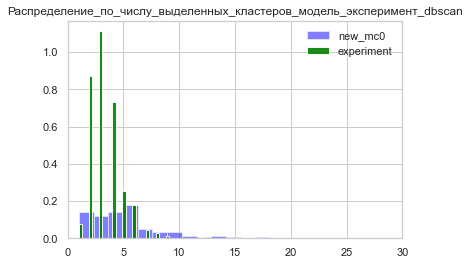

In [325]:
# Распределение по высотам
tit = 'Распределение_по_числу_выделенных_кластеров_модель_эксперимент_dbscan'
plt.title(tit)
plt.hist(uniq_h_new, bins = 50, density = True, alpha = 0.5, color  = 'blue', label = 'new_mc0')
plt.hist(uniq_h_exp, bins = 50, density = True, alpha = 0.9, color = 'green', label = 'experiment')
plt.savefig(f'images/distributions/{tit}.png')
plt.xlim([0,30])
plt.legend()
plt.show()

### Доминирующие высоты в старом банке и в новом банке.
  
Мы не знаем, какое распределение доминирующих высот в экспериментальных данных, потому что мы не знаем высоты в экспериментальных данных.   

In [4]:
clustered_df = pd.read_csv('clusterdata/clusteredDF', sep = '\t')
coef_df = pd.read_csv('clusterdata/coefDF', sep = '\t')

In [6]:
def return_dom_h(data, name, clust):
    nums = list(set(data[name]))
    Dom_H = []

    for num in nums:
        
#         if num%1000==0:
#             print(num)

        one = data[data[name]==num].copy()
        
        clusters = one[clust].unique()
        dom_h_one = []
        
        for c in clusters:
            value = one[one[clust]==c]['H(J)'].value_counts().head(1)
            dom_h_one.append(value.index[0])
        
        Dom_H = Dom_H + dom_h_one
            
    return Dom_H

In [7]:
dom_h_new = return_dom_h(clustered_df, 'num', 'cluster_agl')
dom_h_old = return_dom_h(clustered_df_old, ' num_of_family', 'cluster_agl')

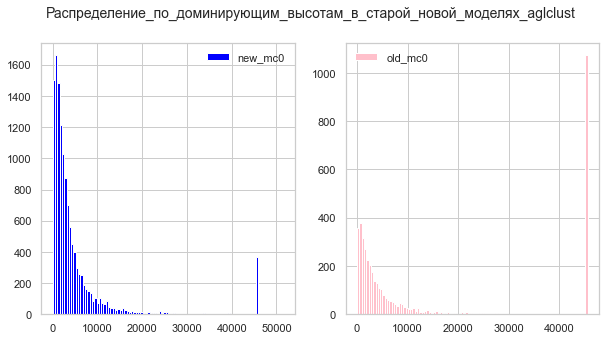

In [329]:
tit = 'Распределение_по_доминирующим_высотам_в_старой_новой_моделях_aglclust'

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.hist(dom_h_new, bins = 100, color  = 'blue', label = 'new_mc0')
#ax1.set_xlim([0, ])
ax1.legend()

ax2.hist(dom_h_old, bins = 100, color = 'pink', label = 'old_mc0')
#ax2.set_xlim([0, ])
ax2.legend()

plt.suptitle(tit, size = 14)
plt.savefig(f'images/distributions/{tit}.png', dpi=100)
plt.show()

In [ ]:
# Что-то надо с этим сделать. 
# Может какая-то предобученныя моделька, которая предсказывает высоту.
# dom_h_exp = return_dom_h(clustered_df_exp, ' num_of_fam', 'cluster_agl')

### Корреляционный плот - число доминирующих высот - число кластеров

In [40]:
clustered_df = pd.read_csv('clusterdata/clusteredDF', sep = '\t')
coef_df = pd.read_csv('clusterdata/coefDF', sep = '\t')

In [22]:
clustered_df = pd.read_csv('clusterdata/clusteredDFold', sep = '\t')
coef_df = pd.read_csv('clusterdata/coefDFold', sep = '\t')

In [24]:
clustered_df.head()

,num_of_family,j,X(J),Y(J),E(J),H(J),E0,A0,log_E0,R,ER,sum_energy,labels,cluster_agl,cluster_db
0,1,1,-3.013189,-7.227429,4.611031,1255.250,3366.712,1,3.527206,7.830392,36.106180,370.199507,2,3,0
1,1,2,-1.310529,-2.563248,12.047700,1545.054,3366.712,1,3.527206,2.878841,34.683415,370.199507,3,0,0
2,1,3,-2.178048,-2.144561,5.401844,3044.520,3366.712,1,3.527206,3.056638,16.511481,370.199507,4,0,0
3,1,4,-0.965465,-0.082880,5.325506,4715.523,3366.712,1,3.527206,0.969016,5.160501,370.199507,6,0,0
4,1,5,-1.621645,0.079540,15.935060,3044.520,3366.712,1,3.527206,1.623595,25.872076,370.199507,4,0,0


In [16]:
def return_number_dom_h_cluster(data, name, clust):
    
    nums = list(set(data[name]))

    number_dom_h = []
    number_clusters = []
    
    for num in nums:

        # Выделяем одно семейство
        one = data[data[name]==num].copy()
        
        #смотрим кластеры
        clusters = one[clust].unique()
        number_clusters.append(len(clusters))        
        
        dom_h_one = []
        
        # идем по кластерам
        for c in clusters:
            value = one[one[clust]==c]['H(J)'].value_counts().head(1) # находим доминирующую высоту
            
            dom_h_one.append(value.index[0]) # добавляем ее в перечень высот
        
        number_dom_h_one = len(list(set(dom_h_one))) 
        number_dom_h.append(number_dom_h_one)
            
    return pd.DataFrame({'num': nums,'number_dom_h':number_dom_h, 'number_clusters': number_clusters})

In [25]:
plotdf = return_number_dom_h_cluster(clustered_df, 'num', 'cluster_agl')

In [7]:
plotdf.head()

,num,number_dom_h,number_clusters
0,1,4,4
1,2,3,3
2,3,4,4
3,4,2,2
4,5,3,3


Одно семейства:  
    Три кластера. У них максимум три самых частых высоты.  
    Если у нас две доминирующих высоты, то в двух кластерах у нас определяется одна высота.  

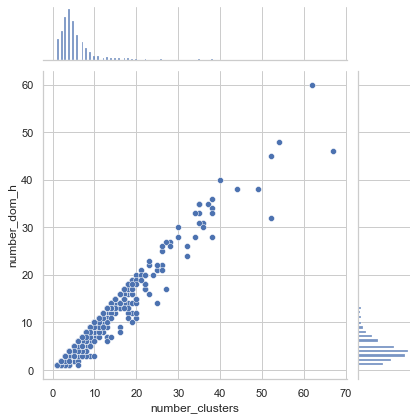

In [10]:
sns.jointplot(x = plotdf['number_clusters'], y = plotdf['number_dom_h'],  kind='scatter')

In [ ]:
# Фиксированное число кластера: (1, 2) - число доминирующих высот по кластерам.

In [39]:
# Возращает распределение семейство - число 

def return_number_h_cluster(data, name, clust):
    
    nums = list(set(data[name]))

    number_dom_h = []
    number_clusters = []
    
    for num in nums:

        # Выделяем одно семейство
        one = data[data[name]==num].copy()
        
        clusters = []
        dom_h_one = []
                    
        # число кластеров  
        number_clusters.append(len(one[clust].unique()))
        
        # число высот в семействе         
        number_h_one = len(one['H(J)'].unique())
        number_dom_h.append(number_h_one)
            
    return pd.DataFrame({'num': nums,'number_h':number_dom_h, 'number_clusters': number_clusters})

Wall time: 3.24 s


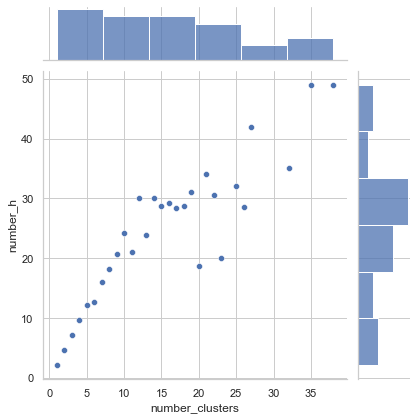

In [41]:
%%time
# Новый модельный банк
plotdf = return_number_h_cluster(clustered_df, 'num', 'cluster_agl')

newdf = plotdf[plotdf['number_clusters']<50].copy()
newdf = newdf[newdf['number_h']<50].copy()
newdf = newdf.groupby('number_clusters').mean().reset_index()

sns.jointplot(x = newdf['number_clusters'], y = newdf['number_h'],  kind='scatter')

Wall time: 1.44 s


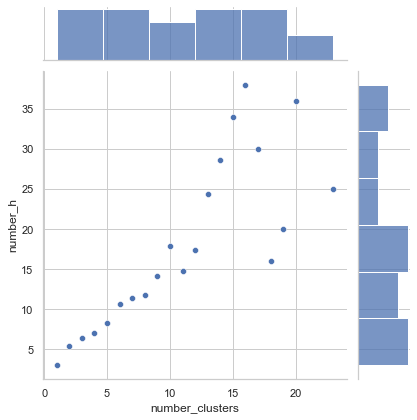

In [38]:
%%time
plotdf = return_number_h_cluster(clustered_df, ' num_of_family', 'cluster_agl')

#newdf = plotdf[plotdf['number_clusters']<50].copy()
newdf = newdf.groupby('number_clusters').mean().reset_index()

sns.jointplot(x = newdf['number_clusters'], y = newdf['number_h'],  kind='scatter')

Wall time: 2.82 s


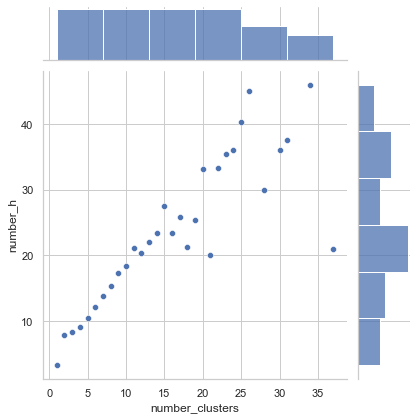

In [42]:
%%time
plotdf = return_number_h_cluster(clustered_df, 'num', 'cluster_db')

newdf = plotdf[plotdf['number_clusters']<50].copy()
newdf = newdf[newdf['number_h']<50].copy()
newdf = newdf.groupby('number_clusters').mean().reset_index()

sns.jointplot(x = newdf['number_clusters'], y = newdf['number_h'],  kind='scatter')

Wall time: 6.56 s


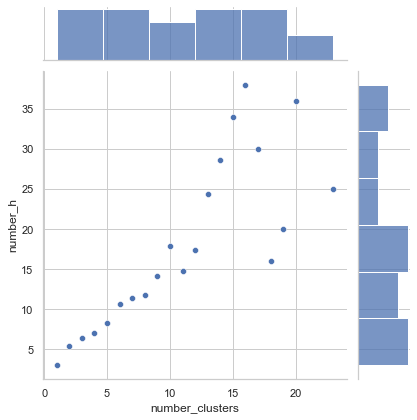

In [33]:
%%time
plotdf = return_number_h_cluster(clustered_df, ' num_of_family', 'cluster_db')

#newdf = plotdf[plotdf['number_clusters']<50].copy()
newdf = newdf.groupby('number_clusters').mean().reset_index()

sns.jointplot(x = newdf['number_clusters'], y = newdf['number_h'],  kind='scatter')

Wall time: 2.67 s


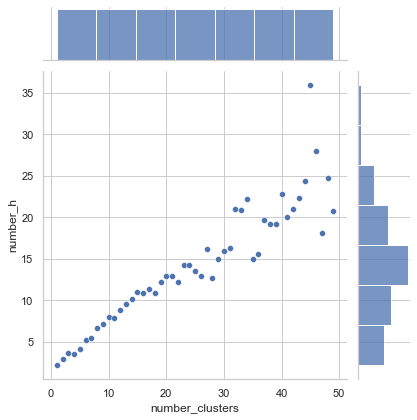

In [43]:
%%time
plotdf = return_number_h_cluster(clustered_df, 'num', 'cluster_op')

newdf = plotdf[plotdf['number_clusters']<50].copy()
newdf = newdf[newdf['number_clusters']<50].copy()
newdf = newdf.groupby('number_clusters').mean().reset_index()

sns.jointplot(x = newdf['number_clusters'], y = newdf['number_h'],  kind='scatter')

<AxesSubplot:>

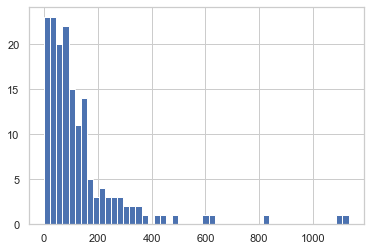

In [62]:
newdf['number_clusters'].hist(bins = 50)

<AxesSubplot:>

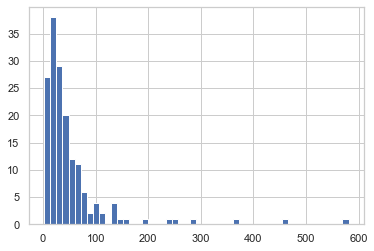

In [63]:
newdf['number_h'].hist(bins = 50)

In [ ]:
# Регрессия число кластеров - число высот. Кобзарь 653 - робастная. 

### Распределение по расстояниям от энергетического центра кластера

In [291]:
# Функция возвращает датафрейм со значением rc для частицы
# rc - расстояние между энергетически взвешенным центром выделенного алгоритмом кластера до частицы в кластере.

def return_rcall_df(clustered_df, name, alg):
    
    nums = clustered_df[name].unique()
    rcall_df = []
    
    for num in nums:
        if num%1000==0:
            print(num)

        df = clustered_df[clustered_df[name]==num].copy()
        clusters = df[f'cluster_{alg}'].unique()

        rc_df = []

        for c in clusters:
            one = df[df[f'cluster_{alg}']==c].copy()

            # энергетически взвешенный центр
            center_x = (one['X(J)']*one['E(J)']).sum()/one['E(J)'].sum()
            center_y = (one['Y(J)']*one['E(J)']).sum()/one['E(J)'].sum()

            one[f'rc_{alg}'] = ((center_x-one['X(J)'])**2 + (center_y - one['Y(J)'])**2)**0.5

            rc_df.append(one)

        rc_df = pd.concat(rc_df)
        rcall_df.append(rc_df)
    
    rcall_df = pd.concat(rcall_df)
    
    return rcall_df

In [292]:
%%time
rcall_df_new = return_rcall_df(clustered_df, 'num', 'agl')

1000
2000
Wall time: 1min 7s


In [293]:
%%time
rcall_df_new = return_rcall_df(rcall_df_new, 'num', 'db')

1000
2000
Wall time: 1min 17s


In [294]:
%%time
rcall_df_exp = return_rcall_df(clustered_df_exp, ' num_of_fam', 'agl')

In [295]:
%%time
rcall_df_exp = return_rcall_df(rcall_df_exp, ' num_of_fam', 'db')

In [296]:
# Сохранение обработанных файлов в папку datachanged
#rcall_df.to_csv('clusterdata/clusteredDF', sep = '\t', index = False)

In [297]:
# Сохранение обработанных файлов в папку datachanged
#rcall_df_exp.to_csv('clusterdata/clusteredDFexp', sep = '\t', index = False)

In [195]:
rcall_df = pd.read_csv('clusterdata/clusteredDF', sep = '\t')
rcall_df_exp = pd.read_csv('clusterdata/clusteredDFexp', sep = '\t')

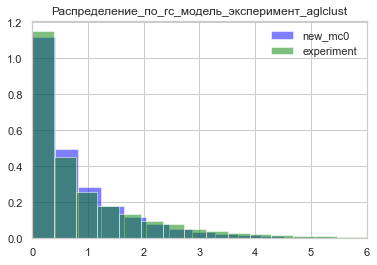

In [300]:
# Распределение по высотам
tit = 'Распределение_по_rc_модель_эксперимент_aglclust'
plt.title(tit)
plt.hist(rcall_df['rc'], bins = 50, density = True, alpha = 0.5, color  = 'blue', label = 'new_mc0')
plt.hist(rcall_df_exp['rc_agl'], bins = 50, density = True, alpha = 0.5, color = 'green', label = 'experiment')

plt.savefig(f'images/distributions/{tit}.png')
plt.xlim([0,6])
plt.legend()
plt.show()

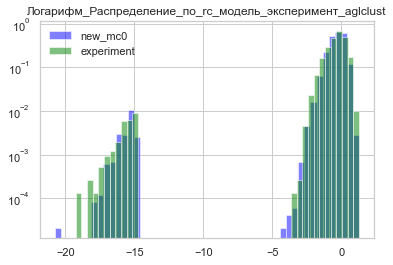

In [330]:
# Распределение по высотам
tit = 'Логарифм_Распределение_по_rc_модель_эксперимент_aglclust'
plt.title(tit)

mc0_rc = np.abs(rcall_df['rc'])
exp_rc = np.abs(rcall_df_exp['rc_agl'])

mc0_rc = np.log10(np.where(mc0_rc!=0.0, mc0_rc, 1))
exp_rc = np.log10(np.where(exp_rc!=0.0, exp_rc, 1))

plt.hist(mc0_rc, bins = 50, density = True, log =True, alpha = 0.5, color  = 'blue', label = 'new_mc0')
plt.hist(exp_rc, bins = 50, density = True, log = True, alpha = 0.5, color = 'green', label = 'experiment')

plt.savefig(f'images/distributions/{tit}.png')
#plt.xlim([0,1.5])
plt.legend()
plt.show()

### Распределение по расстоянию от центра события

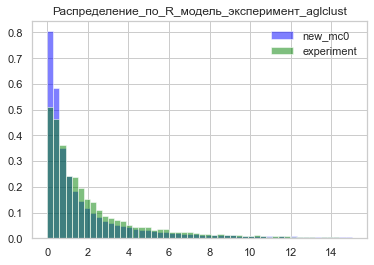

In [302]:
# Распределение по высотам
tit = 'Распределение_по_R_модель_эксперимент_aglclust'
plt.title(tit)
plt.hist(rcall_df['R'], bins = 50, density = True, alpha = 0.5, color  = 'blue', label = 'new_mc0')
plt.hist(rcall_df_exp['R'], bins = 50, density = True, alpha = 0.5, color = 'green', label = 'experiment')

plt.savefig(f'images/distributions/{tit}.png')
#plt.xlim([0,6])
plt.legend()
plt.show()

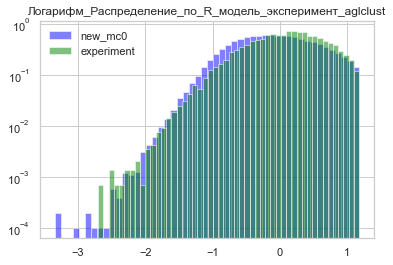

In [331]:
tit = 'Логарифм_Распределение_по_R_модель_эксперимент_aglclust'
plt.title(tit)

mc0_rc = np.log10(rcall_df['R'])
exp_rc = np.log10(rcall_df_exp['R'])


plt.hist(mc0_rc, bins = 50, density = True, log =True, alpha = 0.5, color  = 'blue', label = 'new_mc0')
plt.hist(exp_rc, bins = 50, density = True, log = True, alpha = 0.5, color = 'green', label = 'experiment')

plt.savefig(f'images/distributions/{tit}.png')
#plt.xlim([0,1.5])
plt.legend()
plt.show()